## Lecture 9

### standard score (z-score)
* z = (x – μ) / σ
* z-score is unit-less, can be + or -
* z-score is a numerical measurement that describes a value's relationship to the mean of a group of values
* when distribution is approx. normal, z-score can be conveniently mapped to probabilities
* z-score is measured in terms of standard deviations from the mean
* if a Z-score is 0, it indicates that the data point's score is identical to the mean score.

### correlation
* measures the (linear) relationship between two variables, X = [x1, x2, …Xn], and Y = [y1, y2, …, yn]
    * E.g. between one’s height and weight
* Between results of two tests
    * Problem: the two variables may be on different unit, different scale, or different distribution
* Option 1: convert the measurement to standardized score (z-score)
    * Pearson Correlation Coefficient
* Option 2: sort the values and convert the measurement to ranks
    * Spearman Rank Correlation Coefficient

### pearson correlation coefficient
* a single number that measures both the strength and direction of the linear relationship between two continuous variables
* it has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmg0dRoJ1DiowlpdYiJy3G3SoMtC1wrFPhMw&usqp=CAU)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
friends = np.array([ 70, 65, 72, 63, 71, 64, 60, 64, 67])
minutes = np.array([175, 170, 205, 120, 220, 130, 105, 145, 190])

#to calculate z-score
def zscore(numArray):
    return(numArray-np.mean(numArray))/np.std(numArray)
zfriends=zscore(friends)
zminutes=zscore(minutes)

plt.scatter(zfriends,zminutes)#using the range/scale of z-score, normalized
plt.xlabel('z_friends')
plt.ylabel('z_minutes')
plt.show()

In [ ]:
#to calculate pearson correlation coefficient

#z-score of Xi multiplied by the z-score of Yi
zfriends.dot(zminutes)/len(friends)
#using np.corrcoef gives the same result as the dot product
np.corrcoef(friends,minutes)

In [ ]:
#Pearson correlation coefficient is sensitive to outliers
friends2=np.append(friends,1) #adding point to friends array
minutes2=np.append(minutes,1000) #adding point to minutes array
np.corrcoef(friends2, minutes2)[0,1] #[0,1] only returns the value in the 0,1 spot within the matrix

#what happens to original plot when you add outliers
plt.scatter(friends2,minutes2)
plt.show() #the same distribution of points will show on a z-score plot, but with different scale

### Spearman Rank Correlation Coefficient 
* a technique which can be used to summarise the strength and direction (negative or positive) of a relationship between two variables
* result will always be between 1 and -1
    * a value of +1 means a perfect association of rank
    * a value of 0 means that there is no association between ranks
    * a value of -1 means a perfect negative association of rank
* di = difference between the two ranks of each observation
* n = number of observations

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Spearman%E2%80%99s_Rank_Correlation_2.png)


In [ ]:
#to compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample
#then we compute Pearson’s correlation for the ranks

#argsort->perform an indirect sort along the given axis using the algorithm specified by the "kind" keyword
#returns an array of indices of the same shape as the given array to sort that index data in sorted order.
friends_rank = np.argsort(np.argsort(friends))
#np.argsort(friends) returns an array of the indexes of the elements in friends in sorted order from least to greatest
#np.argsort(np.argsort(friends)) returns an array of of the elements in np.argsort(friends) in sorted order from least to greatest
minutes_rank = np.argsort(np.argsort(minutes))

print(np.corrcoef(friends_rank, minutes_rank)[0,1]) #Return Pearson product-moment correlation coefficients
plt.scatter(friends_rank,minutes_rank)

#testing dataset with outliers, dataset points marked with diamonds
friends_rank2 = np.argsort(np.argsort(friends2))
minutes_rank2 = np.argsort(np.argsort(minutes2))
print(np.corrcoef(friends_rank2, minutes_rank2)[0,1]) #Return Pearson product-moment correlation coefficients
plt.scatter(friends_rank2,minutes_rank2,marker="d")
plt.show()

### correlation
* correlation only measures linear relationship
* correlation does not imply causation
* In general, correlation between two variables does not tell you
whether one causes the other, or the other way around or whether
they might both be caused by something else altogether. 
* Ways to help figure out: time, randomized controlled trial, etc. 

![](https://greenteapress.com/thinkstats/html/thinkstats018.png)
![](https://greenteapress.com/thinkstats/html/thinkstats023.png)

### probability mass function
* a function over the sample space of a discrete random variable X which gives the probability that X is equal to a certain value
* f(x)=P[X=x]

TypeError: 'str' object is not callable

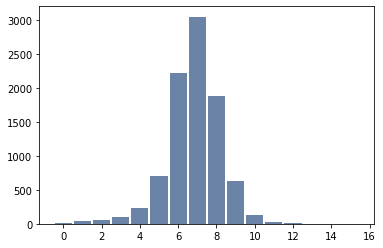

In [65]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

import nsfg
import first
import thinkstats2
import thinkplot

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Frequency")

TypeError: 'str' object is not callable

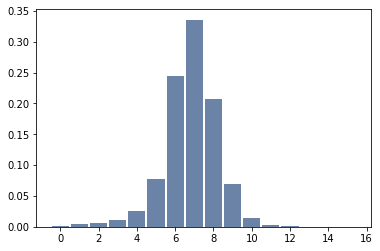

In [63]:

n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n
    

thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Probability")

In [ ]:
hist = thinkstats2.Hist(live.prglngth, label="prglngth")
pmf = thinkstats2.Pmf(live.prglngth, label="prglngth")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="Frequency")
plt.show()
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="Pmf")
plt.show()

TypeError: 'str' object is not callable

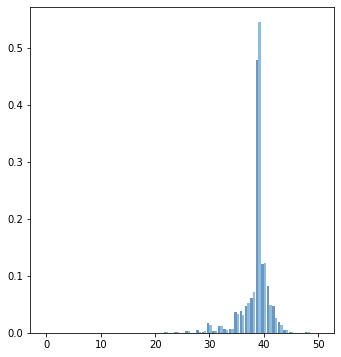

In [67]:
live, firsts, others = first.MakeFrames()

first_pmf = thinkstats2.Pmf(firsts.prglngth, label="firsts")
other_pmf = thinkstats2.Pmf(others.prglngth, label="others")

width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Pregnancy length(weeks)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Pregnancy length(weeks)", axis=axis)
plt.show()
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')
plt.show()